###### Import all libraries

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will

##### Load data from excel - Residential Property Rates of Bangalore Multistorey Apartment for Jan-Mar 2019

In [154]:
# The code was removed by Watson Studio for sharing.

Locality Average Price(Rs./Sq-ft)
0         A Narayanapura                     8490
1                Adugodi                     8858
2  Agrahara Daasarahalli                    11262
3             Amruthalli                     6242
4             AnjanaPura                    4,264

##### get location data for all areas in Bangalore

In [4]:
df_data.size
df_data.tail()

Locality Average Price(Rs./Sq-ft)
139     Whitefield                    5,866
140        Yediyur                     1500
141  Yelchenahalli                     4333
142  Yeshwanthpura                    8,025
143  Yeshwanthpura                     8117

In [5]:
def getlat_Long(names, price ):
    list =[]
    city = ", Bangalore"
    for name, price in zip(names, price):

        address = name + city
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        if (location != None):
            latitude = location.latitude
            longitude = location.longitude
            list.append([name, price, latitude, longitude])
#            print (name)
#            print('The geograpical coordinate are {}, {}.'.format(latitude, longitude))
        else : 
            print('no data for' , name)
    df_data2= pd.DataFrame(list)
    df_data2.columns = ['Locality', 
                        'price',
                  'Latitude', 
                  'Longitude']
    print ('over')
    return (df_data2)

In [6]:
#df_data.insert(2, "Latitude", "NA") 
#df_data.insert(3,"Longitude","NA")
DF= getlat_Long(names=df_data['Locality'], 
                            price =df_data['Average Price(Rs./Sq-ft)'])

no data for Agrahara Daasarahalli
no data for Doddanna Industrial Estate
no data for Kottanur
no data for Rajarajeshwarinagar
no data for Saddgunte Palya
no data for Shivanagar
no data for Vasanth pura
no data for Venkateshpura
no data for Vishveswarapuram
over


In [7]:
DF

Locality   price   Latitude  Longitude
0                 A Narayanapura    8490  12.993194  77.670377
1                        Adugodi    8858  12.942847  77.610416
2                     Amruthalli    6242  13.061793  77.598085
3                     AnjanaPura   4,264  12.858081  77.558071
4                        Arakere   6,109  13.200112  77.538787
5                    Ashok Nagar   13168  12.969436  77.609232
6                      Attiguppe    6643  12.962847  77.529168
7                         Atturu    6645  13.100409  77.858725
8                  Ayyappa Nagar    4549  12.988408  77.647719
9                     Azad Nagar    9000  12.957058  77.551282
10                   Bagalakunte    4165  13.059800  77.499883
11                  Banashankari   6,322  12.915221  77.573598
12                     Banaswadi   5,494  13.014162  77.651854
13                    Bandepalya    5000  12.895997  77.641775
14                  Bapuji Nagar    7000  12.954321  77.539697
15                  Basavanagudi  10,108  12.941726  77.575502
16            Basaveshwara Nagar    6970  12.993224  77.539158
17                         Begur   4,668  12.863389  77.613011
18                     Bellandur   6,443  12.979120  77.591300
19                Benniganahalli    7000  12.994919  77.662603
20                   Benson Town   9,804  12.997803  77.604175
21                Bharathi Nagar    6000  13.138476  77.620499
22                   Bilekahalli   4,864  12.899593  77.610317
23                     Binnipete   10471  12.972297  77.559678
24                  Bommanahalli   4,653  13.345732  77.433335
25                    BTM Layout   5,590  12.915177  77.610282
26                    Byrasandra    4000  13.237324  77.847373
27               C V Raman Nagar   7,053  12.985648  77.664977
28                   Chamrajapet    8500  12.957648  77.566502
29                Chandra Layout    3000  12.965293  77.518155
30                      Chickpet   13000  12.968003  77.578642
31                Chikkalasandra   4,345  12.912192  77.547634
32                    Cooke Town   9,062  13.002785  77.624747
33                   Dasarahalli    4654  13.099485  77.836101
34             Dattatreya Temple    7000  12.924798  77.540144
35               Dayananda Nagar    6350  12.991025  77.564519
36           Devara Jeevanahalli    8250  13.015830  77.603112
37                    Devasandra    4000  13.001198  77.688193
38             Dodda Bommasandra    4000  13.056340  77.557118
39                        Domlur   7,740  12.962467  77.638196
40                       Ejipura    5972  12.945245  77.626914
41                   Gandhinagar   12000  12.977153  77.578401
42                 Ganesh Mandir    6000  12.932924  77.571276
43                   Ganga Nagar    5950  13.023247  77.588357
44                     Gottigere   5,109  13.181988  77.243144
45                      Halasuru  12,495  12.977879  77.624670
46                        Hebbal   7,895  13.038218  77.591900
47                  Hegganahalli    3362  13.218733  77.610435
48                     Herohalli    4167  12.982277  77.483153
49              Hombegowda Nagar    7500  12.979120  77.591300
50                   Hongasandra    3910  12.897536  77.628075
51                      Horamavu   4,562  13.027331  77.660151
52                     Hosahalli    5143  13.350099  77.742908
53                 Hosakerehalli    4151  12.930188  77.537833
54                    Hosur Road   4,604  12.877382  77.647052
55                    HSR Layout   6,917  12.911623  77.638862
56                  Indira Nagar  10,323  12.973291  77.640467
57                        Jakkur   5,589  13.078474  77.606894
58                     Jalahalli   5,727  13.046453  77.548380
59                     Jayamahal   10000  12.998812  77.597579
60                     Jayanagar  11,436  12.929273  77.582423
61           Jayanagar 5th Block    8709  12.919460  77.583321
62           Jayanagar 9th Block    6750  12.918050  77

In [8]:
df_data1 = DF
df_data1.head()

Locality  price   Latitude  Longitude
0  A Narayanapura   8490  12.993194  77.670377
1         Adugodi   8858  12.942847  77.610416
2      Amruthalli   6242  13.061793  77.598085
3      AnjanaPura  4,264  12.858081  77.558071
4         Arakere  6,109  13.200112  77.538787

In [7]:
#df_data2 = df_data1.dropna(subset=["Longitude"],axis=0, inplace=True)
#df_data.reset_index(drop=True, inplace=True)

In [9]:
# Now the dataframe contains all the locality in Bangalore with its price and co-ordinates
df_data.rename(columns={'Average Price(Rs./Sq-ft)':'Price'},inplace= True)
df_data1.rename(columns={'price':'Price'},inplace= True)
df_data

Locality   Price
0                 A Narayanapura    8490
1                        Adugodi    8858
2          Agrahara Daasarahalli   11262
3                     Amruthalli    6242
4                     AnjanaPura   4,264
5                        Arakere   6,109
6                    Ashok Nagar   13168
7                      Attiguppe    6643
8                         Atturu    6645
9                  Ayyappa Nagar    4549
10                    Azad Nagar    9000
11                   Bagalakunte    4165
12                  Banashankari   6,322
13                     Banaswadi   5,494
14                    Bandepalya    5000
15                  Bapuji Nagar    7000
16                  Basavanagudi  10,108
17            Basaveshwara Nagar    6970
18                         Begur   4,668
19                     Bellandur   6,443
20                Benniganahalli    7000
21                   Benson Town   9,804
22                Bharathi Nagar    6000
23                   Bilekahalli   4,864
24                     Binnipete   10471
25                  Bommanahalli   4,653
26                    BTM Layout   5,590
27                    Byrasandra    4000
28               C V Raman Nagar   7,053
29                   Chamrajapet    8500
30                Chandra Layout    3000
31                      Chickpet   13000
32                Chikkalasandra   4,345
33                    Cooke Town   9,062
34                   Dasarahalli    4654
35             Dattatreya Temple    7000
36               Dayananda Nagar    6350
37           Devara Jeevanahalli    8250
38                    Devasandra    4000
39             Dodda Bommasandra    4000
40    Doddanna Industrial Estate    4500
41                        Domlur   7,740
42                       Ejipura    5972
43                   Gandhinagar   12000
44                 Ganesh Mandir    6000
45                   Ganga Nagar    5950
46                     Gottigere   5,109
47                      Halasuru  12,495
48                        Hebbal   7,895
49                  Hegganahalli    3362
50                     Herohalli    4167
51              Hombegowda Nagar    7500
52                   Hongasandra    3910
53                      Horamavu   4,562
54                     Hosahalli    5143
55                 Hosakerehalli    4151
56                    Hosur Road   4,604
57                    HSR Layout   6,917
58                  Indira Nagar  10,323
59                        Jakkur   5,589
60                     Jalahalli   5,727
61                     Jayamahal   10000
62                     Jayanagar  11,436
63           Jayanagar 5th Block    8709
64           Jayanagar 9th Block    6750
65                      JP Nagar   5,657
66                     K R Puram   4,730
67               Kacharkanahalli    2000
68                      Kadugodi   4,759
69              Kadugondanahalli    5000
70                       Kalkere   4,214
71                  Kalyan Nagar   6,033
72                  Kanaka Nagar    6290
73                    Karisandra    1800
74              Kempegowda Nagar    1500
75                       Kengeri   4,259
76                   Kodigehalli    9490
77                   Koramangala  10,617
78                      Kothanur   5,432
79                      Kottanur    4839
80            Kumaraswamy Layout   4,774
81                  Kundalahalli   5,713
82                 Kuvempu Nagar    3000
83                       Laggere    9000
84                 Lingarajapura    5731
85                      Madivala    6000
86                   Magadi Road   8,225
87                  Mahadevapura   6,195
88                  Malleshwaram  12,034
89                  Marathahalli   6,281
90                   Marenahalli    3498
91            Maruthi Seva Nagar    6162
92              Muneshwara Nagar    3665
93                 Murugeshpalya   7,350
94                    Nagarbhavi   4,937
95                    Nagasandra    7191
96                      Nagavara   7,375
97    

In [10]:
df_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
Locality     135 non-null object
Price        135 non-null object
Latitude     135 non-null float64
Longitude    135 non-null float64
dtypes: float64(2), object(2)
memory usage: 4.3+ KB


In [11]:
df_data1['Price'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
df_data['Price'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
df_data1['Price']=df_data1['Price'].astype(int)
df_data['Price']=df_data['Price'].astype(int)
df_data1['Locality']=df_data1['Locality'].astype(str)
df_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
Locality     135 non-null object
Price        135 non-null int64
Latitude     135 non-null float64
Longitude    135 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.3+ KB


In [12]:
df_data1.tail(20)

Locality  Price   Latitude  Longitude
115     Shettihalli   3500  12.752835  77.730593
116   Shivaji Nagar  10900  16.677924  74.251582
117       Siddapura   3500  12.954260  77.730974
118     Singasandra   4527  12.685041  77.697563
119        Srinagar   7750  12.943882  77.554177
120   Subhash Nagar  12000  12.982667  77.569539
121  Subramanyapura   4707  12.883971  77.541211
122   Sudham Nagara   7500  12.966210  77.588534
123   T.Dasarahalli   7258  13.045141  77.514789
124     Uttarahalli   4675  12.905568  77.545544
125         Varthur   5446  12.940615  77.746994
126   Vasanth Nagar   6163  12.988721  77.585169
127     Vijayanagar   5686  12.971889  77.545789
128     Vijayanagar   5686  12.971889  77.545789
129      Whitefield   5866  12.969637  77.749745
130      Whitefield   5866  12.969637  77.749745
131         Yediyur   1500  13.131224  77.695768
132   Yelchenahalli   4333  12.901113  77.567089
133   Yeshwanthpura   8025  13.025609  77.554107
134   Yeshwanthpura   8117  13.025609  77.554107

#### Now lets analyze the data and visualize it using data visualization methods

In [13]:
#### fix the errors in location co-ordinates for below areas 
#Bommanahalli
#Gottigere
#Mahadevapura
#Ambalipura
#Koramangala

df_data1.loc[df_data1['Locality'] == 'Koramangala', 'Latitude'] = 12.9352
df_data1.loc[df_data1['Locality'] == 'Koramangala', 'Longitude'] = 77.6244

df_data1.loc[df_data1['Locality'] == 'Bommanahalli', 'Latitude'] = 12.9030
df_data1.loc[df_data1['Locality'] == 'Bommanahalli', 'Longitude'] = 77.6242

df_data1.loc[df_data1['Locality'] == 'Ambalipura', 'Latitude'] = 12.9150
df_data1.loc[df_data1['Locality'] == 'Ambalipura', 'Longitude'] = 77.6701

df_data1.loc[df_data1['Locality'] == 'Gottigere', 'Latitude'] = 12.8564
df_data1.loc[df_data1['Locality'] == 'Gottigere', 'Longitude'] = 77.5888

df_data1.loc[df_data1['Locality'] == 'Mahadevapura', 'Latitude'] = 12.9226373
df_data1.loc[df_data1['Locality'] == 'Mahadevapura', 'Longitude'] = 77.6895

df_data1.loc[df_data1['Locality'] == 'Madivala', 'Latitude'] = 12.9880
df_data1.loc[df_data1['Locality'] == 'Madivala', 'Longitude'] = 77.617444
df_data1.loc[df_data1['Locality'] == 'Gunjur', 'Latitude'] = 12.920895
df_data1.loc[df_data1['Locality'] == 'Gunjur', 'Longitude'] = 77.734478


In [14]:
df_data1.loc[df_data1['Locality'] == 'Cunningham Road', 'Locality'] = "Shivaji Nagar"
df_data1.loc[df_data1['Locality'] == 'Frazer Town', 'Locality'] = "Pulikeshi Nagar"
df_data1

Locality  Price   Latitude  Longitude
0                 A Narayanapura   8490  12.993194  77.670377
1                        Adugodi   8858  12.942847  77.610416
2                     Amruthalli   6242  13.061793  77.598085
3                     AnjanaPura   4264  12.858081  77.558071
4                        Arakere   6109  13.200112  77.538787
5                    Ashok Nagar  13168  12.969436  77.609232
6                      Attiguppe   6643  12.962847  77.529168
7                         Atturu   6645  13.100409  77.858725
8                  Ayyappa Nagar   4549  12.988408  77.647719
9                     Azad Nagar   9000  12.957058  77.551282
10                   Bagalakunte   4165  13.059800  77.499883
11                  Banashankari   6322  12.915221  77.573598
12                     Banaswadi   5494  13.014162  77.651854
13                    Bandepalya   5000  12.895997  77.641775
14                  Bapuji Nagar   7000  12.954321  77.539697
15                  Basavanagudi  10108  12.941726  77.575502
16            Basaveshwara Nagar   6970  12.993224  77.539158
17                         Begur   4668  12.863389  77.613011
18                     Bellandur   6443  12.979120  77.591300
19                Benniganahalli   7000  12.994919  77.662603
20                   Benson Town   9804  12.997803  77.604175
21                Bharathi Nagar   6000  13.138476  77.620499
22                   Bilekahalli   4864  12.899593  77.610317
23                     Binnipete  10471  12.972297  77.559678
24                  Bommanahalli   4653  12.903000  77.624200
25                    BTM Layout   5590  12.915177  77.610282
26                    Byrasandra   4000  13.237324  77.847373
27               C V Raman Nagar   7053  12.985648  77.664977
28                   Chamrajapet   8500  12.957648  77.566502
29                Chandra Layout   3000  12.965293  77.518155
30                      Chickpet  13000  12.968003  77.578642
31                Chikkalasandra   4345  12.912192  77.547634
32                    Cooke Town   9062  13.002785  77.624747
33                   Dasarahalli   4654  13.099485  77.836101
34             Dattatreya Temple   7000  12.924798  77.540144
35               Dayananda Nagar   6350  12.991025  77.564519
36           Devara Jeevanahalli   8250  13.015830  77.603112
37                    Devasandra   4000  13.001198  77.688193
38             Dodda Bommasandra   4000  13.056340  77.557118
39                        Domlur   7740  12.962467  77.638196
40                       Ejipura   5972  12.945245  77.626914
41                   Gandhinagar  12000  12.977153  77.578401
42                 Ganesh Mandir   6000  12.932924  77.571276
43                   Ganga Nagar   5950  13.023247  77.588357
44                     Gottigere   5109  12.856400  77.588800
45                      Halasuru  12495  12.977879  77.624670
46                        Hebbal   7895  13.038218  77.591900
47                  Hegganahalli   3362  13.218733  77.610435
48                     Herohalli   4167  12.982277  77.483153
49              Hombegowda Nagar   7500  12.979120  77.591300
50                   Hongasandra   3910  12.897536  77.628075
51                      Horamavu   4562  13.027331  77.660151
52                     Hosahalli   5143  13.350099  77.742908
53                 Hosakerehalli   4151  12.930188  77.537833
54                    Hosur Road   4604  12.877382  77.647052
55                    HSR Layout   6917  12.911623  77.638862
56                  Indira Nagar  10323  12.973291  77.640467
57                        Jakkur   5589  13.078474  77.606894
58                     Jalahalli   5727  13.046453  77.548380
59                     Jayamahal  10000  12.998812  77.597579
60                     Jayanagar  11436  12.929273  77.582423
61           Jayanagar 5th Block   8709  12.919460  77.583321
62           Jayanagar 9th Block   6750  12.918050  77.592263
63                      JP Nagar   5657  12.907251  77.5

In [15]:
#Remove duplicates
df_data1.sort_values("Locality",inplace=True)
df_data1.drop_duplicates(subset='Locality',keep='first', inplace=True)
df_data1.tail(25)

Locality  Price   Latitude  Longitude
107        Sampangiram Nagar   8500  12.975878  77.590601
108             Sanjay Nagar   7672  12.957866  77.695875
109                  Sarakki   6000  12.907969  77.583127
110           Sarvagna Nagar   6000  12.990689  77.633359
111           Satellite Town   4285  12.979120  77.591300
112  Shakthi Ganapathi Nagar   8000  12.995399  77.528959
113            Shankar Nagar   7000  13.015836  77.543892
114            Shanthi Nagar   1679  12.958254  77.602571
115              Shettihalli   3500  12.752835  77.730593
116            Shivaji Nagar  10900  16.677924  74.251582
117                Siddapura   3500  12.954260  77.730974
118              Singasandra   4527  12.685041  77.697563
119                 Srinagar   7750  12.943882  77.554177
120            Subhash Nagar  12000  12.982667  77.569539
121           Subramanyapura   4707  12.883971  77.541211
122            Sudham Nagara   7500  12.966210  77.588534
123            T.Dasarahalli   7258  13.045141  77.514789
124              Uttarahalli   4675  12.905568  77.545544
125                  Varthur   5446  12.940615  77.746994
126            Vasanth Nagar   6163  12.988721  77.585169
127              Vijayanagar   5686  12.971889  77.545789
129               Whitefield   5866  12.969637  77.749745
131                  Yediyur   1500  13.131224  77.695768
132            Yelchenahalli   4333  12.901113  77.567089
133            Yeshwanthpura   8025  13.025609  77.554107

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt
count, bin_edges = np.histogram(df_data1['Price'])
df_data1['Price'].plot(kind='hist', figsize=(8,5), xticks=bin_edges)
plt.title("Histogram of Residential Property Rates of Bangalore Multistorey Apartment for Jan-Mar 2019")
plt.ylabel("Number of Localities")
plt.xlabel("Avg SqFt Rate")
plt.show()

##### Lets create a map for Bangalore

In [18]:
address = 'Bangalore, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
lati = location.latitude
longi= location.longitude
print('The geograpical coordinate of Bangalore City are {}, {}.'.format(lati, longi))

The geograpical coordinate of Bangalore City are 12.9791198, 77.5912997.


In [19]:
import os 

# create map of Bangalore using latitude and longitude values
map_Bangalore = folium.Map(location=[lati, longi], zoom_start=10)

# add markers to map
for lat, lng, Location, Price in zip(df_data1['Latitude'], df_data1['Longitude'], df_data1['Locality'], df_data1['Price']):
    label = '{}, {}'.format(Location, Price)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Bangalore)  
    
map_Bangalore

#map_Bangalore.save(os.path.join('results', 'Bangalore map with Sqfeet rates.html'))
#map_Bangalore.save('plot_data.html')
# Import the Folium interactive html file
#from IPython.display import HTML
#HTML('<iframe src=plot_data.html width=700 height=450></iframe>')

In [20]:
# download geojson file
#!wget --quiet https://raw.githubusercontent.com/datameet/Municipal_Spatial_Data/master/Bangalore/BBMP.GeoJSON -O Bangalore.json
##!wget --quiet https://raw.githubusercontent.com/openbangalore/bangalore/master/bangalore/GIS/bangalore_pincode.json -O Bangalore.json
#####!wget --quiet http://raw.githubusercontent.com/openbangalore/bangalore/master/bangalore/GIS/BBMP_Wards_2011_region.json -O Bangalore.json
#    https://dataplatform.cloud.ibm.com/projects/06c25a5b-8df2-4749-bfa2-c0b2ed0bc3d1/data-assets/431ed51e-6063-40ea-821e-1026e671f2e7/preview?context=wdp&label=true
!wget --quiet https://raw.githubusercontent.com/Jothi-Nadarajan/Coursera_Capstone/master/document_V4.json -O Bangalore.json
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [21]:
Bangalore_geo = r'Bangalore.json' # geojson file

# create a plain Bangalore map
Cmap_Bangalore = folium.Map(location=[lati, longi], zoom_start=12)
Cmap_Bangalore

#map_Bangalore = folium.Map(location=[lati, longi], zoom_start=10), tiles='Mapbox Bright'

In [22]:
# generate choropleth map using the Avg Price of each Locality in Bangalore
Cmap_Bangalore.choropleth(
    geo_data=Bangalore_geo,
    data=df_data,
    columns=['Locality', 'Price'],
    key_on='feature.properties.WARD_NAME',
    fill_color='YlOrRd',
#    bins=[1, 2, 3, 6],
#    nan_fill_color='purple',
#    nan_fill_opacity=0.4,
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Residential Apartment Price Range in Bangalore'
)

# display map
Cmap_Bangalore

In [190]:
# The code was removed by Watson Studio for sharing.

#### Explore the venues in each locality

In [24]:
def getNearbyVenues(names, latitudes, longitudes, Price, radius=500):
    
    venues_list=[]
    for name, lat, lng, price in zip(names, latitudes, longitudes, Price):
#        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            price,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 'Price',
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
Bangalore_venues = getNearbyVenues(names=df_data1['Locality'],
                                   latitudes=df_data1['Latitude'],
                                   longitudes=df_data1['Longitude'],
                                   Price = df_data1['Price']
                                  )

In [26]:
Bangalore_venues.head()

Neighborhood  Price  Neighborhood Latitude  Neighborhood Longitude  \
0  A Narayanapura   8490              12.993194               77.670377   
1  A Narayanapura   8490              12.993194               77.670377   
2  A Narayanapura   8490              12.993194               77.670377   
3  A Narayanapura   8490              12.993194               77.670377   
4  A Narayanapura   8490              12.993194               77.670377   

            Venue  Venue Latitude  Venue Longitude    Venue Category  
0      McDonald's       12.993667        77.666576      Burger Joint  
1  Domino's Pizza       12.995288        77.666318       Pizza Place  
2        Nilgiris       12.993644        77.667203  Department Store  
3         MedPlus       12.993617        77.666853          Pharmacy  
4       Hot Chips       12.993521        77.666746       Snack Place

In [27]:
Bangalore_venues.shape

(1125, 8)

In [28]:
#df_bar = Bangalore_venues([Neighborhood])
df_bar = Bangalore_venues.groupby(['Neighborhood','Price'])['Neighborhood'].count().reset_index(name="count")
df_bar.sort_values('count', ascending=False , axis =0, inplace=True)
df_bar.head()

Neighborhood  Price  count
63   Koramangala  10617     90
4    Ashok Nagar  13168     87
52     Jayanagar  11436     55
47  Indira Nagar  10323     46
38    HSR Layout   6917     41

In [29]:
df_bar.tail()

Neighborhood  Price  count
49           Jakkur   5589      1
98    Shankar Nagar   7000      1
95   Sarvagna Nagar   6000      1
10      Bagalakunte   4165      1
112   Yeshwanthpura   8025      1

In [30]:
count = 10
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 100]
df_bar['count'].plot(kind='hist', figsize=(8,5), xticks=bin_edges)
plt.title("Histogram of Venues in Bangalore Neighbourhood")
plt.ylabel("Number of Neighbourhoods")
plt.xlabel("Number of Venues")
plt.show()

In [31]:
df_bar1=df_bar.head(25)
df_bar1.set_index('Neighborhood',inplace=True)
df_bar2=df_bar.tail(25)
df_bar2.set_index('Neighborhood',inplace=True)

In [32]:
# Lets create a chart to show the Number of venues in each Locality/Neighbourhood Top 25 cases
 
plt.figure(figsize=(12, 8))
ax = df_bar1['count'].plot(kind='bar')
ax.set_title('Total Number of Venues in a Locality (Top 25)')
ax.set_xlabel('Neighborhood')
ax.set_ylabel('No of Venues')

rects = ax.patches

# Make some labels.
labels = df_bar1['Price']

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

##### Let's find out how many unique categories can be curated from all the returned venues

In [33]:
Bangalore_venues.head()

Neighborhood  Price  Neighborhood Latitude  Neighborhood Longitude  \
0  A Narayanapura   8490              12.993194               77.670377   
1  A Narayanapura   8490              12.993194               77.670377   
2  A Narayanapura   8490              12.993194               77.670377   
3  A Narayanapura   8490              12.993194               77.670377   
4  A Narayanapura   8490              12.993194               77.670377   

            Venue  Venue Latitude  Venue Longitude    Venue Category  
0      McDonald's       12.993667        77.666576      Burger Joint  
1  Domino's Pizza       12.995288        77.666318       Pizza Place  
2        Nilgiris       12.993644        77.667203  Department Store  
3         MedPlus       12.993617        77.666853          Pharmacy  
4       Hot Chips       12.993521        77.666746       Snack Place

In [34]:
print('There are {} uniques categories.'.format(len(Bangalore_venues['Venue Category'].unique())))

There are 175 uniques categories.


In [35]:
# one hot encoding
Bangalore_onehot = pd.get_dummies(Bangalore_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Bangalore_onehot['Neighborhood'] = Bangalore_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Bangalore_onehot.columns[-1]] + list(Bangalore_onehot.columns[:-1])
Bangalore_onehot = Bangalore_onehot[fixed_columns]
Bangalore_onehot.tail(24)

Neighborhood  ATM  American Restaurant  Andhra Restaurant  \
1101  Vasanth Nagar    0                    0                  0   
1102  Vasanth Nagar    0                    0                  0   
1103  Vasanth Nagar    0                    0                  0   
1104  Vasanth Nagar    0                    0                  0   
1105  Vasanth Nagar    0                    0                  0   
1106  Vasanth Nagar    0                    0                  0   
1107  Vasanth Nagar    0                    0                  0   
1108  Vasanth Nagar    0                    0                  0   
1109  Vasanth Nagar    0                    0                  0   
1110  Vasanth Nagar    0                    0                  0   
1111  Vasanth Nagar    0                    0                  0   
1112  Vasanth Nagar    0                    0                  0   
1113    Vijayanagar    0                    0                  0   
1114    Vijayanagar    0                    0                  0   
1115    Vijayanagar    0                    0                  0   
1116     Whitefield    0                    0                  0   
1117     Whitefield    0                    0                  0   
1118     Whitefield    0                    0                  0   
1119     Whitefield    0                    0                  0   
1120     Whitefield    0                    0                  0   
1121     Whitefield    0                    0                  0   
1122     Whitefield    0                    0                  0   
1123     Whitefield    0                    0                  0   
1124  Yeshwanthpura    0                    0                  0   

      Antique Shop  Arcade  Art Gallery  Art Museum  Arts & Crafts Store  \
1101             0       0            0           1                    0   
1102             0       0            0           0                    0   
1103             0       0            0           0                    0   
1104             0       0            0           0                    0   
1105             0       0            0           0                    0   
1106             0       0            0           0                    0   
1107             0       0            0           0                    0   
1108             0       0            0           0                    0   
1109             0       0            0           0                    0   
1110             0       0            0           0                    0   
1111             0       0            0           0                    0   
1112             0       0            0           0                    0   
1113             0       0            0           0                    0   
1114             0       0            0           0                    0   
1115             0       0            0           0                    0   
1116             0       0            0           0                    0   
1117             0       0            0           0                    0   
1118             0       0            0           0                    0   
1119             0       0            0           0                    0   
1120             0       0            0           0                    0   
1121             0       0            0           0                    0   
1122             0       0            0           0                    0   
1123             0       0            0           0                    0   
1124             0       0            0           0                    0   

      Asian Restaurant  Athletics & Sports  Auto Garage  Auto Workshop  \
1101                 0                   0            0              0   
1102                 0                   0            0              0   
1103                 0                   0            0              0   
1104                 0                   0            0              0   
1105                 0             

In [36]:
Bangalore_grouped = Bangalore_onehot.groupby('Neighborhood').mean().reset_index()
Bangalore_grouped

Neighborhood  ATM  American Restaurant  Andhra Restaurant  \
0                 A Narayanapura  0.0             0.000000           0.000000   
1                        Adugodi  0.0             0.000000           0.000000   
2                     Amruthalli  0.0             0.000000           0.000000   
3                     AnjanaPura  0.0             0.000000           0.000000   
4                    Ashok Nagar  0.0             0.011494           0.011494   
5                      Attiguppe  0.0             0.000000           0.000000   
6                         Atturu  0.0             0.000000           0.000000   
7                  Ayyappa Nagar  0.0             0.000000           0.000000   
8                     Azad Nagar  0.0             0.000000           0.000000   
9                     BTM Layout  0.0             0.000000           0.000000   
10                   Bagalakunte  0.0             0.000000           0.000000   
11                  Banashankari  0.0             0.000000           0.000000   
12                     Banaswadi  0.0             0.000000           0.000000   
13                    Bandepalya  0.0             0.000000           0.000000   
14                  Bapuji Nagar  0.0             0.000000           0.000000   
15                  Basavanagudi  0.0             0.000000           0.000000   
16            Basaveshwara Nagar  0.0             0.000000           0.000000   
17                         Begur  0.0             0.000000           0.000000   
18                     Bellandur  0.0             0.000000           0.000000   
19                Benniganahalli  0.0             0.000000           0.000000   
20                   Benson Town  0.0             0.000000           0.000000   
21                   Bilekahalli  0.0             0.000000           0.000000   
22                     Binnipete  0.0             0.000000           0.000000   
23                  Bommanahalli  0.0             0.000000           0.000000   
24               C V Raman Nagar  0.0             0.000000           0.000000   
25                   Chamrajapet  0.0             0.000000           0.000000   
26                Chandra Layout  0.0             0.000000           0.000000   
27                      Chickpet  0.0             0.000000           0.000000   
28                Chikkalasandra  0.0             0.000000           0.000000   
29                    Cooke Town  0.0             0.000000           0.000000   
30             Dattatreya Temple  0.0             0.000000           0.000000   
31             Dodda Bommasandra  0.0             0.000000           0.000000   
32                        Domlur  0.0             0.000000           0.000000   
33                       Ejipura  0.0             0.000000           0.000000   
34                   Gandhinagar  0.0             0.000000           0.000000   
35                 Ganesh Mandir  0.0             0.000000           0.000000   
36                   Ganga Nagar  0.0             0.000000           0.000000   
37                     Gottigere  0.0             0.000000           0.000000   
38                    HSR Layout  0.0             0.000000           0.000000   
39                      Halasuru  0.0             0.000000           0.000000   
40                        Hebbal  0.0             0.000000           0.000000   
41                     Herohalli  0.0             0.000000           0.000000   
42              Hombegowda Nagar  0.0             0.000000           0.000000   
43                   Hongasandra  0.0             0.000000           0.000000   
44                      Horamavu  0.0             0.000000           0.000000   
45                 Hosakerehalli  0.0             0.000000           0.000000   
46                    Hosur Road  0.0             0.000000           0.000000   
47                  Indira Nagar  0.0             0.000000           0.000000   
48                      JP Nagar  0.0             0

In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
# Let's take the top venues for analysis
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Bangalore_grouped['Neighborhood']

for ind in np.arange(Bangalore_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Bangalore_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0  A Narayanapura              Bus Stop              Pharmacy   
1         Adugodi            Playground        Ice Cream Shop   
2      Amruthalli            Shoe Store           Yoga Studio   
3      AnjanaPura                  Pool           Coffee Shop   
4     Ashok Nagar                  Café     Indian Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Snack Place      Department Store          Dessert Shop   
1           Bus Station    Athletics & Sports                  Café   
2           Coffee Shop     Fish & Chips Shop  Fast Food Restaurant   
3     Fish & Chips Shop  Fast Food Restaurant        Farmers Market   
4                   Pub                 Hotel        Clothing Store   

  6th Most Common Venue 7th Most Common Venue        8th Most Common Venue  \
0          Burger Joint           Pizza Place                  Bus Station   
1                 Diner  Fast Food Restaurant               Farmers Market   
2        Farmers Market           Event Space            Electronics Store   
3           Event Space     Electronics Store  Eastern European Restaurant   
4            Donut Shop                   Bar                Shopping Mall   

         9th Most Common Venue 10th Most Common Venue  
0                  Yoga Studio         Farmers Market  
1                  Event Space      Electronics Store  
2  Eastern European Restaurant    Dumpling Restaurant  
3          Dumpling Restaurant             Donut Shop  
4               Ice Cream Shop       Department Store

In [39]:
neighborhoods_venues_sorted

Neighborhood          1st Most Common Venue  \
0                 A Narayanapura                       Bus Stop   
1                        Adugodi                     Playground   
2                     Amruthalli                     Shoe Store   
3                     AnjanaPura                           Pool   
4                    Ashok Nagar                           Café   
5                      Attiguppe                 Sandwich Place   
6                         Atturu                          Dhaba   
7                  Ayyappa Nagar                   Intersection   
8                     Azad Nagar                    Pizza Place   
9                     BTM Layout              Indian Restaurant   
10                   Bagalakunte                    Snack Place   
11                  Banashankari                  Metro Station   
12                     Banaswadi  Vegetarian / Vegan Restaurant   
13                    Bandepalya                    Coffee Shop   
14                  Bapuji Nagar              Indian Restaurant   
15                  Basavanagudi              Indian Restaurant   
16            Basaveshwara Nagar                 Ice Cream Shop   
17                         Begur                  Grocery Store   
18                     Bellandur                       Vineyard   
19                Benniganahalli                 Clothing Store   
20                   Benson Town                    Candy Store   
21                   Bilekahalli              Indian Restaurant   
22                     Binnipete                  Metro Station   
23                  Bommanahalli              Indian Restaurant   
24               C V Raman Nagar                    Pizza Place   
25                   Chamrajapet           Fast Food Restaurant   
26                Chandra Layout                     Restaurant   
27                      Chickpet      Middle Eastern Restaurant   
28                Chikkalasandra              Indian Restaurant   
29                    Cooke Town                           Café   
30             Dattatreya Temple                    Pizza Place   
31             Dodda Bommasandra                  Historic Site   
32                        Domlur              Indian Restaurant   
33                       Ejipura              Indian Restaurant   
34                   Gandhinagar              Indian Restaurant   
35                 Ganesh Mandir           Fast Food Restaurant   
36                   Ganga Nagar              Indian Restaurant   
37                     Gottigere              Indian Restaurant   
38                    HSR Layout                           Café   
39                      Halasuru                          Hotel   
40                        Hebbal                          Hotel   
41                     Herohalli                   Concert Hall   
42              Hombegowda Nagar                       Vineyard   
43                   Hongasandra                  Metro Station   
44                      Horamavu              Indian Restaurant   
45                 Hosakerehalli              Indian Restaurant   
46                    Hosur Road              Indian Restaurant   
47                  Indira Nagar                         Lounge   
48                      JP Nagar                           Café   
49                        Jakkur                            ATM   
50                     Jalahalli                  Shopping Mall   
51                     Jayamahal                      Juice Bar   
52                     Jayanagar              Indian Restaurant   
53           Jayanagar 5th Block              Indian Restaurant   
54           Jayanagar 9th Block              Indian Restaurant   
55                     K R Puram                          Hotel   
56               Kacharkanahalli           Fast Food Restaurant   
57                      Kadugodi                     Playground   
58              Kadugondanahalli              Indian Restaurant   


### Cluster Neighborhoods

In [40]:
neighborhoods_venues_sorted.head()
#neighborhoods_venues_sorted.drop("Cluster Labels", axis=1, inplace=True)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0  A Narayanapura              Bus Stop              Pharmacy   
1         Adugodi            Playground        Ice Cream Shop   
2      Amruthalli            Shoe Store           Yoga Studio   
3      AnjanaPura                  Pool           Coffee Shop   
4     Ashok Nagar                  Café     Indian Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Snack Place      Department Store          Dessert Shop   
1           Bus Station    Athletics & Sports                  Café   
2           Coffee Shop     Fish & Chips Shop  Fast Food Restaurant   
3     Fish & Chips Shop  Fast Food Restaurant        Farmers Market   
4                   Pub                 Hotel        Clothing Store   

  6th Most Common Venue 7th Most Common Venue        8th Most Common Venue  \
0          Burger Joint           Pizza Place                  Bus Station   
1                 Diner  Fast Food Restaurant               Farmers Market   
2        Farmers Market           Event Space            Electronics Store   
3           Event Space     Electronics Store  Eastern European Restaurant   
4            Donut Shop                   Bar                Shopping Mall   

         9th Most Common Venue 10th Most Common Venue  
0                  Yoga Studio         Farmers Market  
1                  Event Space      Electronics Store  
2  Eastern European Restaurant    Dumpling Restaurant  
3          Dumpling Restaurant             Donut Shop  
4               Ice Cream Shop       Department Store

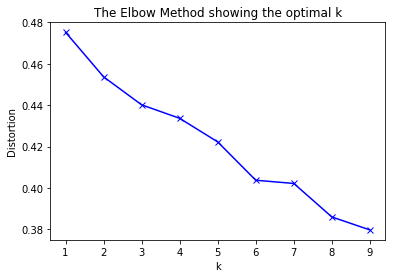

In [44]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

Bangalore_grouped_clustering = Bangalore_grouped.drop('Neighborhood', 1)

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Bangalore_grouped_clustering)
    kmeanModel.fit(Bangalore_grouped_clustering)
    distortions.append(sum(np.min(cdist(Bangalore_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / Bangalore_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [45]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Bangalore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 3, 3, 0, 3, 0, 3, 3, 0], dtype=int32)

In [46]:
Bangalore_merged = df_data1
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
# merge Bangalore_grouped with Bangalore_data to add latitude/longitude for each neighborhood
Bangalore_merged = Bangalore_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Locality')

Bangalore_merged.head() # check the last columns!

Locality  Price   Latitude  Longitude  Cluster Labels  \
0  A Narayanapura   8490  12.993194  77.670377             3.0   
1         Adugodi   8858  12.942847  77.610416             3.0   
2      Amruthalli   6242  13.061793  77.598085             3.0   
3      AnjanaPura   4264  12.858081  77.558071             3.0   
4         Arakere   6109  13.200112  77.538787             NaN   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0              Bus Stop              Pharmacy           Snack Place   
1            Playground        Ice Cream Shop           Bus Station   
2            Shoe Store           Yoga Studio           Coffee Shop   
3                  Pool           Coffee Shop     Fish & Chips Shop   
4                   NaN                   NaN                   NaN   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0      Department Store          Dessert Shop          Burger Joint   
1    Athletics & Sports                  Café                 Diner   
2     Fish & Chips Shop  Fast Food Restaurant        Farmers Market   
3  Fast Food Restaurant        Farmers Market           Event Space   
4                   NaN                   NaN                   NaN   

  7th Most Common Venue        8th Most Common Venue  \
0           Pizza Place                  Bus Station   
1  Fast Food Restaurant               Farmers Market   
2           Event Space            Electronics Store   
3     Electronics Store  Eastern European Restaurant   
4                   NaN                          NaN   

         9th Most Common Venue 10th Most Common Venue  
0                  Yoga Studio         Farmers Market  
1                  Event Space      Electronics Store  
2  Eastern European Restaurant    Dumpling Restaurant  
3          Dumpling Restaurant             Donut Shop  
4                          NaN                    NaN

In [47]:
Bangalore_merged.dropna(subset=["Cluster Labels"],axis=0, inplace=True)
Bangalore_merged.info()
Bangalore_merged['Cluster Labels']= Bangalore_merged['Cluster Labels'].astype(int)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 133
Data columns (total 15 columns):
Locality                  113 non-null object
Price                     113 non-null int64
Latitude                  113 non-null float64
Longitude                 113 non-null float64
Cluster Labels            113 non-null float64
1st Most Common Venue     113 non-null object
2nd Most Common Venue     113 non-null object
3rd Most Common Venue     113 non-null object
4th Most Common Venue     113 non-null object
5th Most Common Venue     113 non-null object
6th Most Common Venue     113 non-null object
7th Most Common Venue     113 non-null object
8th Most Common Venue     113 non-null object
9th Most Common Venue     113 non-null object
10th Most Common Venue    113 non-null object
dtypes: float64(3), int64(1), object(11)
memory usage: 14.1+ KB


#### Finally, let's visualize the resulting clusters

In [189]:
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Bangalore_merged['Latitude'], Bangalore_merged['Longitude'], Bangalore_merged['Locality'], Bangalore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(Cmap_Bangalore)
Cmap_Bangalore

In [48]:
# add clustering labels
# create map
map_clusters = folium.Map(location=[lati, longi], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Bangalore_merged['Latitude'], Bangalore_merged['Longitude'], Bangalore_merged['Locality'], Bangalore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

In [55]:
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 0, Bangalore_merged.columns[[0] + [1] + list(range(5, Bangalore_merged.shape[1]))]]

Locality  Price          1st Most Common Venue  \
5                    Ashok Nagar  13168                           Café   
7                         Atturu   6645                          Dhaba   
25                    BTM Layout   5590              Indian Restaurant   
11                  Banashankari   6322                  Metro Station   
12                     Banaswadi   5494  Vegetarian / Vegan Restaurant   
13                    Bandepalya   5000                    Coffee Shop   
15                  Basavanagudi  10108              Indian Restaurant   
16            Basaveshwara Nagar   6970                 Ice Cream Shop   
27               C V Raman Nagar   7053                    Pizza Place   
28                   Chamrajapet   8500           Fast Food Restaurant   
29                Chandra Layout   3000                     Restaurant   
31                Chikkalasandra   4345              Indian Restaurant   
39                        Domlur   7740              Indian Restaurant   
40                       Ejipura   5972              Indian Restaurant   
42                 Ganesh Mandir   6000           Fast Food Restaurant   
43                   Ganga Nagar   5950              Indian Restaurant   
55                    HSR Layout   6917                           Café   
45                      Halasuru  12495                          Hotel   
46                        Hebbal   7895                          Hotel   
51                      Horamavu   4562              Indian Restaurant   
53                 Hosakerehalli   4151              Indian Restaurant   
54                    Hosur Road   4604              Indian Restaurant   
63                      JP Nagar   5657                           Café   
58                     Jalahalli   5727                  Shopping Mall   
60                     Jayanagar  11436              Indian Restaurant   
61           Jayanagar 5th Block   8709              Indian Restaurant   
62           Jayanagar 9th Block   6750              Indian Restaurant   
64                     K R Puram   4730                          Hotel   
65               Kacharkanahalli   2000           Fast Food Restaurant   
70                  Kanaka Nagar   6290                 Clothing Store   
71                    Karisandra   1800                          Diner   
77            Kumaraswamy Layout   4774                 Sandwich Place   
82                      Madivala   6000              Indian Restaurant   
83                   Magadi Road   8225               Department Store   
85                  Malleshwaram  12034              Indian Restaurant   
86                  Marathahalli   6281              Indian Restaurant   
90                 Murugeshpalya   7350              Indian Restaurant   
91                    Nagarbhavi   4937        North Indian Restaurant   
100                 Puttenahalli   3500                    Coffee Shop   
104                 RMV II Stage   1415                     Playground   
101                 Rajaji Nagar  12716                    Snack Place   
102  Rajajinagar Industrial Town  12716              Indian Restaurant   
103                Richmond Town  10806              Indian Restaurant   
108                 Sanjay Nagar   7672                 Clothing Store   
109                      Sarakki   6000              Indian Restaurant   
114                Shanthi Nagar   1679                          Hotel   
119                     Srinagar   7750                    Coffee Shop   
121               Subramanyapura   4707              Indian Restaurant   
122                Sudham Nagara   7500                 Breakfast Spot   
123                T.Dasarahalli   7258                    Pizza Place   
126                Vasanth Nagar   6163                          Hotel   

             2nd Most Common Venue          3rd Most Common Venue  \
5                Indian Restaurant                            Pub   
7                Indian Restaurant   

In [56]:
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 1, Bangalore_merged.columns[[0]+[1] + list(range(5, Bangalore_merged.shape[1]))]]

Locality  Price 1st Most Common Venue 2nd Most Common Venue  \
10     Bagalakunte   4165           Snack Place           Yoga Studio   
93        Nagavara   7375           Coffee Shop           Snack Place   
116  Shivaji Nagar  10900           Snack Place           Yoga Studio   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
10            Coffee Shop     Fish & Chips Shop  Fast Food Restaurant   
93            Yoga Studio     Fish & Chips Shop  Fast Food Restaurant   
116           Coffee Shop     Fish & Chips Shop  Fast Food Restaurant   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
10         Farmers Market           Event Space     Electronics Store   
93         Farmers Market           Event Space     Electronics Store   
116        Farmers Market           Event Space     Electronics Store   

           9th Most Common Venue 10th Most Common Venue  
10   Eastern European Restaurant    Dumpling Restaurant  
93   Eastern European Restaurant    Dumpling Restaurant  
116  Eastern European Restaurant    Dumpling Restaurant

In [57]:
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 2, Bangalore_merged.columns[[0]+[1] + list(range(5, Bangalore_merged.shape[1]))]]

Locality  Price 1st Most Common Venue 2nd Most Common Venue  \
14       Bapuji Nagar   7000     Indian Restaurant         Metro Station   
22        Bilekahalli   4864     Indian Restaurant          Antique Shop   
24       Bommanahalli   4653     Indian Restaurant      Department Store   
41        Gandhinagar  12000     Indian Restaurant             Bookstore   
44          Gottigere   5109     Indian Restaurant      Department Store   
67   Kadugondanahalli   5000     Indian Restaurant             Pool Hall   
105        S K Garden   9800     Indian Restaurant           Yoga Studio   
125           Varthur   5446     Indian Restaurant              Pharmacy   
133     Yeshwanthpura   8025     Indian Restaurant           Yoga Studio   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
14       Department Store    Travel & Transport           Bus Station   
22               Pharmacy           Yoga Studio                 Diner   
24            Yoga Studio                 Diner     Fish & Chips Shop   
41        Bed & Breakfast                  Park          Dessert Shop   
44          Grocery Store           Yoga Studio                 Diner   
67        Motorcycle Shop           Yoga Studio                 Diner   
105                 Diner     Fish & Chips Shop  Fast Food Restaurant   
125      Department Store           Yoga Studio                 Diner   
133                 Diner     Fish & Chips Shop  Fast Food Restaurant   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
14    Dumpling Restaurant           Flea Market     Fish & Chips Shop   
22      Fish & Chips Shop  Fast Food Restaurant        Farmers Market   
24   Fast Food Restaurant        Farmers Market           Event Space   
41                  Diner            Restaurant    Seafood Restaurant   
44      Fish & Chips Shop  Fast Food Restaurant        Farmers Market   
67   Fast Food Restaurant        Farmers Market           Event Space   
105        Farmers Market           Event Space     Electronics Store   
125  Fast Food Restaurant        Farmers Market           Event Space   
133        Farmers Market           Event Space     Electronics Store   

           9th Most Common Venue       10th Most Common Venue  
14          Fast Food Restaurant               Farmers Market  
22                   Event Space            Electronics Store  
24             Electronics Store  Eastern European Restaurant  
41                   Bus Station                Shopping Mall  
44                   Event Space            Electronics Store  
67             Electronics Store  Eastern European Restaurant  
105  Eastern European Restaurant          Dumpling Restaurant  
125            Electronics Store  Eastern European Restaurant  
133  Eastern European Restaurant          Dumpling Restaurant

In [58]:
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 3, Bangalore_merged.columns[[0]+[1] + list(range(5, Bangalore_merged.shape[1]))]]

Locality  Price      1st Most Common Venue  \
0             A Narayanapura   8490                   Bus Stop   
1                    Adugodi   8858                 Playground   
2                 Amruthalli   6242                 Shoe Store   
3                 AnjanaPura   4264                       Pool   
6                  Attiguppe   6643             Sandwich Place   
8              Ayyappa Nagar   4549               Intersection   
9                 Azad Nagar   9000                Pizza Place   
17                     Begur   4668              Grocery Store   
18                 Bellandur   6443                   Vineyard   
19            Benniganahalli   7000             Clothing Store   
20               Benson Town   9804                Candy Store   
23                 Binnipete  10471              Metro Station   
30                  Chickpet  13000  Middle Eastern Restaurant   
32                Cooke Town   9062                       Café   
34         Dattatreya Temple   7000                Pizza Place   
38         Dodda Bommasandra   4000              Historic Site   
48                 Herohalli   4167               Concert Hall   
49          Hombegowda Nagar   7500                   Vineyard   
50               Hongasandra   3910              Metro Station   
56              Indira Nagar  10323                     Lounge   
57                    Jakkur   5589                        ATM   
59                 Jayamahal  10000                  Juice Bar   
66                  Kadugodi   4759                 Playground   
69              Kalyan Nagar   6033          Indian Restaurant   
73                   Kengeri   4259                Pizza Place   
75               Koramangala  10617                       Café   
76                  Kothanur   5432                Pizza Place   
78              Kundalahalli   5713       Fast Food Restaurant   
79             Kuvempu Nagar   3000                       Park   
84              Mahadevapura   6195                       Café   
88        Maruthi Seva Nagar   6162       Fast Food Restaurant   
92                Nagasandra   7191                       Pool   
94            Nandini Layout   6471             Breakfast Spot   
95              Nayandahalli   5840         Miscellaneous Shop   
96                Nilasandra   6203                        Spa   
97          Padmanabha Nagar   6654                 Playground   
98                  Panathur   5905              Train Station   
99                    Peenya   5639                Coffee Shop   
106            Sagayarapuram   8900    South Indian Restaurant   
107        Sampangiram Nagar   8500           Capitol Building   
110           Sarvagna Nagar   6000                Golf Course   
111           Satellite Town   4285                   Vineyard   
112  Shakthi Ganapathi Nagar   8000                       Food   
117                Siddapura   3500                      Hotel   
120            Subhash Nagar  12000                   Platform   
124              Uttarahalli   4675              Movie Theater   
127              Vijayanagar   5686                 Playground   
129               Whitefield   5866                     Bakery   

       2nd Most Common Venue 3rd Most Common Venue  \
0                   Pharmacy           Snack Place   
1             Ice Cream Shop           Bus Station   
2                Yoga Studio           Coffee Shop   
3                Coffee Shop     Fish & Chips Shop   
6         Chinese Restaurant             Juice Bar   
8                       Park           Yoga Studio   
9                  Multiplex         Shopping Mall   
17                    Bakery            Playground   
18          Capitol Building                  Park   
19               Snack Place           Coffee Shop   
20              Intersection                Bakery   
23               Wings Joint   Indie Movie Theater   
30   South Indian Restaurant    Miscellaneous Shop   
32         Convenience Store 

In [59]:
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 4, Bangalore_merged.columns[[0]+[1] + list(range(5, Bangalore_merged.shape[1]))]]

Locality  Price 1st Most Common Venue 2nd Most Common Venue  \
113  Shankar Nagar   7000                Market           Yoga Studio   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
113           Flower Shop     Fish & Chips Shop  Fast Food Restaurant   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
113        Farmers Market           Event Space     Electronics Store   

           9th Most Common Venue 10th Most Common Venue  
113  Eastern European Restaurant    Dumpling Restaurant

In [60]:
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 5, Bangalore_merged.columns[[0]+[1] + list(range(5, Bangalore_merged.shape[1]))]]

Locality  Price 1st Most Common Venue 2nd Most Common Venue  \
89  Muneshwara Nagar   3665            Food Truck           Yoga Studio   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
89           Flower Shop     Fish & Chips Shop  Fast Food Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
89        Farmers Market           Event Space     Electronics Store   

          9th Most Common Venue 10th Most Common Venue  
89  Eastern European Restaurant    Dumpling Restaurant

In [103]:

df_1stVenue = Bangalore_merged.groupby(['Cluster Labels','1st Most Common Venue'])['Cluster Labels'].count().reset_index(name="count")

df_1stVenue.set_index('Cluster Labels','1st Most Common Venue', inplace=True)
df_1stVenue

1st Most Common Venue  count
Cluster Labels                                      
0                              Breakfast Spot      1
0                                        Café      3
0                              Clothing Store      2
0                                 Coffee Shop      3
0                            Department Store      1
0                                       Dhaba      1
0                                       Diner      1
0                        Fast Food Restaurant      3
0                                       Hotel      5
0                              Ice Cream Shop      1
0                           Indian Restaurant     20
0                               Metro Station      1
0                     North Indian Restaurant      1
0                                 Pizza Place      2
0                                  Playground      1
0                                  Restaurant      1
0                              Sandwich Place      1
0                               Shopping Mall      1
0                                 Snack Place      1
0               Vegetarian / Vegan Restaurant      1
1                                 Coffee Shop      1
1                                 Snack Place      2
2                           Indian Restaurant      9
3                                         ATM      1
3                                      Bakery      1
3                              Breakfast Spot      1
3                                    Bus Stop      1
3                                        Café      3
3                                 Candy Store      1
3                            Capitol Building      1
3                              Clothing Store      1
3                                 Coffee Shop      1
3                                Concert Hall      1
3                        Fast Food Restaurant      2
3                                        Food      1
3                                 Golf Course      1
3                               Grocery Store      1
3                               Historic Site      1
3                                       Hotel      1
3                           Indian Restaurant      1
3                                Intersection      1
3                                   Juice Bar      1
3                                      Lounge      1
3                               Metro Station      2
3                   Middle Eastern Restaurant      1
3                          Miscellaneous Shop      1
3                               Movie Theater      1
3                                        Park      1
3                                 Pizza Place      4
3                                    Platform      1
3                                  Playground      4
3                                        Pool      2
3                              Sandwich Place      1
3                                  Shoe Store      1
3                     South Indian Restaurant      1
3                                         Spa      1
3                               Train Station      1
3                                    Vineyard      3
4                                      Market      1
5                                  Food Truck      1

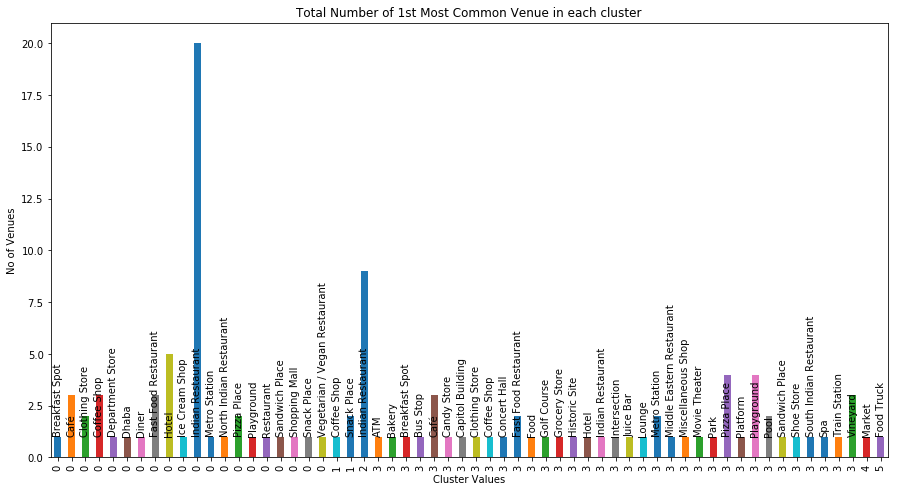

In [89]:
# Lets create a chart to show the Number of 1st Most Common Venue in each cluster

#list = df_1stVenue['1st Most Common Venue']

plt.figure(figsize=(15, 8))
ax = df_1stVenue['count'].plot(kind='bar')
ax.set_title('Total Number of 1st Most Common Venue in each cluster')
ax.set_xlabel('Cluster Values')
ax.set_ylabel('No of Venues')


rects = ax.patches

# Make some labels.
labels2 = df_1stVenue['1st Most Common Venue']

for rect2, label2 in zip(rects, labels2):
    height2 = rect2.get_height()
    ax.text(rect2.get_x() + rect2.get_width() / 2, 1 + 0, label2,
            ha='center', 
            va='bottom',     
            rotation='vertical')
    
#patches, labels = ax.get_legend_handles_labels()
#ax.legend(patches, labels, loc='best')

###ax.legend(df_1stVenue['1st Most Common Venue'])
#ax.legend()
###ax.legend(df_1stVenue['1st Most Common Venue'],loc='best')


In [63]:
#df_1stVenue.reset_index(drop=True, inplace=True)

#Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 3, Bangalore_merged.columns[[0]+[1] + list(range(5, Bangalore_merged.shape[1]))]]

In [70]:
df_1stVenue.head()

1st Most Common Venue  count
Cluster Labels                             
0                     Breakfast Spot      1
0                               Café      3
0                     Clothing Store      2
0                        Coffee Shop      3
0                   Department Store      1

In [188]:
df_bar2 = df_1stVenue.loc[df_1stVenue['count'] > 1, df_1stVenue.columns[[0]+[1]]]
df_bar2.head()

Cluster Labels 1st Most Common Venue
1               0                  Café
2               0        Clothing Store
3               0           Coffee Shop
7               0  Fast Food Restaurant
8               0                 Hotel

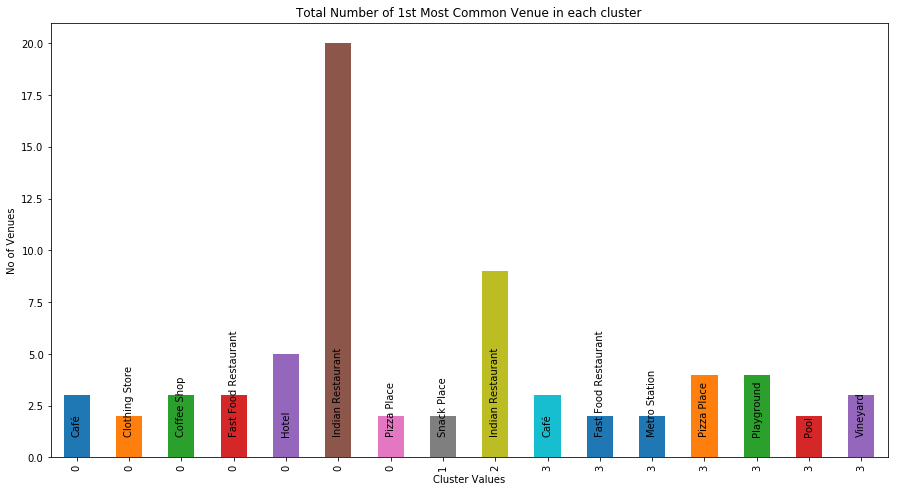

In [149]:
# Lets create a chart to show the Number of 1st Most Common Venue in each cluster with cleaned up data

plt.figure(figsize=(15, 8))
ax = df_bar2['count'].plot(kind='bar')
ax.set_title('Total Number of 1st Most Common Venue in each cluster')
ax.set_xlabel('Cluster Values')
ax.set_ylabel('No of Venues')

rects = ax.patches

# Make some labels.
labels2 = df_bar2['1st Most Common Venue']

for rect2, label2 in zip(rects, labels2):
    height2 = rect2.get_height()
    ax.text(rect2.get_x() + rect2.get_width() / 2, 1 + 0, label2,
            ha='center', 
            va='bottom',     
            rotation='vertical')
#            transform=ax.transAxes)

In [112]:
df_1stVenue.head()
#df_1stVenue.reset_index (inplace=True)
#print (df_temp)

Cluster Labels 1st Most Common Venue  count
0               0        Breakfast Spot      1
1               0                  Café      3
2               0        Clothing Store      2
3               0           Coffee Shop      3
4               0      Department Store      1

In [130]:
df_bar3 = df_1stVenue.copy()

In [131]:
columntitles =["1st Most Common Venue","Cluster Labels", "count"]
df_bar3=df_bar3.reindex(columns =columntitles)


In [132]:
df_bar3.head()

1st Most Common Venue  Cluster Labels  count
0        Breakfast Spot               0      1
1                  Café               0      3
2        Clothing Store               0      2
3           Coffee Shop               0      3
4      Department Store               0      1

In [151]:
#df_bar3.set_index("1st Most Common Venue",inplace=True)
df_bar3

Cluster Labels  count
1st Most Common Venue                               
Breakfast Spot                              0      1
Café                                        0      3
Clothing Store                              0      2
Coffee Shop                                 0      3
Department Store                            0      1
Dhaba                                       0      1
Diner                                       0      1
Fast Food Restaurant                        0      3
Hotel                                       0      5
Ice Cream Shop                              0      1
Indian Restaurant                           0     20
Metro Station                               0      1
North Indian Restaurant                     0      1
Pizza Place                                 0      2
Playground                                  0      1
Restaurant                                  0      1
Sandwich Place                              0      1
Shopping Mall                               0      1
Snack Place                                 0      1
Vegetarian / Vegan Restaurant               0      1
Coffee Shop                                 1      1
Snack Place                                 1      2
Indian Restaurant                           2      9
ATM                                         3      1
Bakery                                      3      1
Breakfast Spot                              3      1
Bus Stop                                    3      1
Café                                        3      3
Candy Store                                 3      1
Capitol Building                            3      1
Clothing Store                              3      1
Coffee Shop                                 3      1
Concert Hall                                3      1
Fast Food Restaurant                        3      2
Food                                        3      1
Golf Course                                 3      1
Grocery Store                               3      1
Historic Site                               3      1
Hotel                                       3      1
Indian Restaurant                           3      1
Intersection                                3      1
Juice Bar                                   3      1
Lounge                                      3      1
Metro Station                               3      2
Middle Eastern Restaurant                   3      1
Miscellaneous Shop                          3      1
Movie Theater                               3      1
Park                                        3      1
Pizza Place                                 3      4
Platform                                    3      1
Playground                                  3      4
Pool                                        3      2
Sandwich Place                              3      1
Shoe Store                                  3      1
South Indian Restaurant                     3      1
Spa                                         3      1
Train Station                               3      1
Vineyard                                    3      3
Market                                      4      1
Food Truck                                  5      1

In [135]:
df_bar3.transpose()

1st Most Common Venue  Breakfast Spot  Café  Clothing Store  Coffee Shop  \
Cluster Labels                      0     0               0            0   
count                               1     3               2            3   

1st Most Common Venue  Department Store  Dhaba  Diner  Fast Food Restaurant  \
Cluster Labels                        0      0      0                     0   
count                                 1      1      1                     3   

1st Most Common Venue  Hotel  Ice Cream Shop  Indian Restaurant  \
Cluster Labels             0               0                  0   
count                      5               1                 20   

1st Most Common Venue  Metro Station  North Indian Restaurant  Pizza Place  \
Cluster Labels                     0                        0            0   
count                              1                        1            2   

1st Most Common Venue  Playground  Restaurant  Sandwich Place  Shopping Mall  \
Cluster Labels                  0           0               0              0   
count                           1           1               1              1   

1st Most Common Venue  Snack Place  Vegetarian / Vegan Restaurant  \
Cluster Labels                   0                              0   
count                            1                              1   

1st Most Common Venue  Coffee Shop  Snack Place  Indian Restaurant  ATM  \
Cluster Labels                   1            1                  2    3   
count                            1            2                  9    1   

1st Most Common Venue  Bakery  Breakfast Spot  Bus Stop  Café  Candy Store  \
Cluster Labels              3               3         3     3            3   
count                       1               1         1     3            1   

1st Most Common Venue  Capitol Building  Clothing Store  Coffee Shop  \
Cluster Labels                        3               3            3   
count                                 1               1            1   

1st Most Common Venue  Concert Hall  Fast Food Restaurant  Food  Golf Course  \
Cluster Labels                    3                     3     3            3   
count                             1                     2     1            1   

1st Most Common Venue  Grocery Store  Historic Site  Hotel  Indian Restaurant  \
Cluster Labels                     3              3      3                  3   
count                              1              1      1                  1   

1st Most Common Venue  Intersection  Juice Bar  Lounge  Metro Station  \
Cluster Labels                    3          3       3              3   
count                             1          1       1              2   

1st Most Common Venue  Middle Eastern Restaurant  Miscellaneous Shop  \
Cluster Labels                                 3                   3   
count                                          1                   1   

1st Most Common Venue  Movie Theater  Park  Pizza Place  Platform  Playground  \
Cluster Labels                     3     3            3         3           3   
count                              1     1            4         1           4   

1st Most Common Venue  Pool  Sandwich Place  Shoe Store  \
Cluster Labels            3               3           3   
count                     2               1           1   

1st Most Common Venue  South Indian Restaurant  Spa  Train Station  Vineyard  \
Cluster Labels                               3    3              3         3   
count                                        1    1              1         3   

1st Most Common Venue  Market  Food Truck  
Cluster Labels              4           5  
count                       1           1

In [162]:
df = pd.DataFrame({'Cluster': [0,1,2,3,4,5],
                  'Breakfast Spot':[1,0,0,0,0,0],
'Café':[3,0,0,3,0,0],
'Clothing Store':[2,0,0,0,0,0],
'Coffee Shop':[3,1,0,0,0,0],
'Fast Food Restaurant':[3,0,0,2,0,0],
'Hotel':[5,0,0,0,0,0],
'Indian Restaurant':[20,0,9,0,0,0],
'Pizza Place':[2,0,0,4,0,0],
'Snack Place':[0,2,0,0,0,0],
'Metro Station':[0,0,0,2,0,0],
'Playground':[0,0,0,4,0,0],
'Pool':[0,0,0,2,0,0],
'Vineyard':[0,0,0,3,0,0],
'Market':[0,0,0,0,1,0],
'Food Truck':[0,0,0,0,0,1],
 
                  })
df.set_index("Cluster",inplace=True)
df.head()

Breakfast Spot  Café  Clothing Store  Coffee Shop  \
Cluster                                                      
0                     1     3               2            3   
1                     0     0               0            1   
2                     0     0               0            0   
3                     0     3               0            0   
4                     0     0               0            0   

         Fast Food Restaurant  Food Truck  Hotel  Indian Restaurant  Market  \
Cluster                                                                       
0                           3           0      5                 20       0   
1                           0           0      0                  0       0   
2                           0           0      0                  9       0   
3                           2           0      0                  0       0   
4                           0           0      0                  0       1   

         Metro Station  Pizza Place  Playground  Pool  Snack Place  Vineyard  
Cluster                                                                       
0                    0            2           0     0            0         0  
1                    0            0           0     0            2         0  
2                    0            0           0     0            0         0  
3                    2            4           4     2            0         3  
4                    0            0           0     0            0         0

In [185]:
# Lets create a chart to show the Number of 1st Most Common Venue in each cluster with cleaned up data
from matplotlib import rcParams
import seaborn as sns
# figure size in inches
rcParams['figure.figsize'] = 22,8
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
#plt.figure(figsize=(12, 40))
ax = df.plot(kind='bar')
ax.set_title('Number of Most Common Venues in each cluster')
ax.set_xlabel('Cluster Values')
ax.set_ylabel('No of Venues')

Text(0,0.5,'No of Venues')